# Homework Problem 0: Making sure you're set up with python
### You will need to be able to run all of these cells without error

In [10]:
import numpy as np
import pandas as pd 
%matplotlib inline

In [11]:
import tqdm


for i in tqdm.tqdm(range(3)):
    print("look at the pretty progress bar")


100%|██████████| 3/3 [00:00<00:00, 57456.22it/s]

look at the pretty progress bar
look at the pretty progress bar
look at the pretty progress bar


In [12]:
# make sure numpy works
arr = np.arange(30).reshape(10, 3)
arr.sum(axis=0)

array([135, 145, 155])

<Axes: >

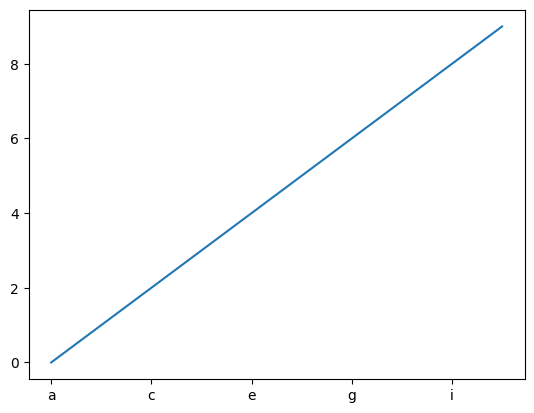

In [13]:
# make sure pandas works
pd.Series(range(10), index=list("abcdefghij")).plot()

In [14]:
# make sure scikit learn works
from sklearn.preprocessing import normalize

arr = np.arange(30).reshape(10, 3)
new_arr = normalize(arr)
(new_arr * new_arr).sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [15]:
from tensorflow.keras.utils import to_categorical

arr = np.array([[1, 2, 1, 0, 5], [3, 4, 1, 0, 5]])
assert to_categorical(arr).shape == (2, 5, 6)

In [16]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K
import tensorflow as tf

K.clear_session()
inpt = Input(shape=(10,))
mat = Dense(1, input_shape=(10,))

res = mat(K.variable(np.ones((10, 1))))

if tf.__version__.startswith("1"):
    print(
        f"you have tensorflow version {tf.__version__}."
        "Your code may not be compatible with everything we do in class"
    )
    result = K.eval(res)
else:
    result = res.numpy()
    assert (result == K.eval(res)).all()

print(result)

[[-1.0861115]
 [-1.0861115]
 [-1.0861115]
 [-1.0861115]
 [-1.0861115]
 [-1.0861115]
 [-1.0861115]
 [-1.0861115]
 [-1.0861115]
 [-1.0861115]]


/Users/bluebird/.pyenv/versions/3.10.11/envs/venv310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
K.clear_session()
inpt = Input(shape=(10,))
mat = Dense(1, input_shape=(10,))
outpt = mat(inpt)

model = Model(inpt, outpt)
model.compile("adam", loss="binary_crossentropy")
assert model.count_params() == 11
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11 (44.00 B)

 Trainable params: 11 (44.00 B)

 Non-trainable params: 0 (0.00 B)

# Homework Problem 1: Company Descriptions from Wikipedia
Downloading data from the web is a large part of working with text.
Importantly, it can be difficult to find the __right__ data. 
Here, we will download the company descriptions from wikipedia for the current set of S&P500 companies. 

## The `wikipedia` package
You can install it with `pip install wikipedia`

We will use `wikipeda.page` to grab data
```python
import wikipedia

page = wikipedia.page(page_url)
print(page.content)
```

In [37]:
import numpy as np
import pandas as pd
%matplotlib inline

from tqdm import tqdm
import wikipedia

## Part 0: get the list of the S&P500 companies
### Hint, a `wikipedia` page has a method `html()` which returns the html from the page
### pandas has `read_html` https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.read_html.html

In [38]:
import requests
from bs4 import BeautifulSoup
import json

# URL of the Wikipedia page
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table with class 'wikitable sortable'
table = soup.find('table', {'class': 'wikitable sortable'})

# Initialize a list to store company data
companies = []

# Iterate through table rows, skipping the header
for row in table.find_all('tr')[1:]:
    cols = row.find_all('td')
    if len(cols) >= 8:  # Ensure we have the right table
        
        # Find instances of links in the first two columns
        symbol_link = cols[0].find('a')
        name_link = cols[1].find('a')
        
        company = {
            "symbol": cols[0].text.strip(),
            "name": cols[1].text.strip(),
            "gics_sector": cols[2].text.strip(),
            "gics_sub_sector": cols[3].text.strip(),
            "headquarters": cols[4].text.strip(),
            "date_added": cols[5].text.strip(),
            "cik": cols[6].text.strip(),
            "founded": cols[7].text.strip(),
            "wikipedia_page": f"https://en.wikipedia.org{name_link['href']}" if name_link else None,
            "nyse_page": f"{symbol_link['href']}" if symbol_link else None
        }
        companies.append(company)

print(companies)

[{'symbol': 'MMM', 'name': '3M', 'gics_sector': 'Industrials', 'gics_sub_sector': 'Industrial Conglomerates', 'headquarters': 'Saint Paul, Minnesota', 'date_added': '1957-03-04', 'cik': '0000066740', 'founded': '1902', 'wikipedia_page': 'https://en.wikipedia.org/wiki/3M', 'nyse_page': 'https://www.nyse.com/quote/XNYS:MMM'}, {'symbol': 'AOS', 'name': 'A. O. Smith', 'gics_sector': 'Industrials', 'gics_sub_sector': 'Building Products', 'headquarters': 'Milwaukee, Wisconsin', 'date_added': '2017-07-26', 'cik': '0000091142', 'founded': '1916', 'wikipedia_page': 'https://en.wikipedia.org/wiki/A._O._Smith', 'nyse_page': 'https://www.nyse.com/quote/XNYS:AOS'}, {'symbol': 'ABT', 'name': 'Abbott Laboratories', 'gics_sector': 'Health Care', 'gics_sub_sector': 'Health Care Equipment', 'headquarters': 'North Chicago, Illinois', 'date_added': '1957-03-04', 'cik': '0000001800', 'founded': '1888', 'wikipedia_page': 'https://en.wikipedia.org/wiki/Abbott_Laboratories', 'nyse_page': 'https://www.nyse.com

## Part 2: For every S&P500 company, get the page content

In [59]:
page_title = companies[0]["wikipedia_page"].split("/")[-1]
print(page_title)

3M


In [60]:
 search_results = wikipedia.search(page_title)
 print(search_results[0])

3M


In [61]:

page = wikipedia.page(page_title, auto_suggest=False)
title = page.title
content = page.content
print(title)

3M


In [62]:
print(content)

3M Company (originally the Minnesota Mining and Manufacturing Company) is an American multinational conglomerate operating in the fields of industry, worker safety, healthcare, and consumer goods. The company produces over 60,000 products under several brands, including adhesives, abrasives, laminates, passive fire protection, personal protective equipment, window films, paint protection films, dental, orthodontic products, electrical, electronic connecting, insulating materials, medical products, car-care products, electronic circuits, healthcare software, and optical films. It is based in Maplewood, a suburb of Saint Paul, Minnesota.
3M made $35.4 billion in total sales in 2021 and ranked number 102 in the Fortune 500 list of the largest United States corporations by total revenue. As of 2021, the company had approximately 95,000 employees and operations in more than 70 countries. There are a few international subsidiaries, such as 3M India, 3M Japan, and 3M Canada.
In June 2023, 3M 

In [20]:
# Create a function to scrape the content of a Wikipedia page
def scrape_page(url):
    #url = companies[0]['wikipedia_page']
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    content_div = soup.find('div', {'id': 'mw-content-text'})
    paragraphs = content_div.find_all('p')  # some content is in ul/ol lists
    content = ''.join([p.get_text() for p in paragraphs])
    
    return content

In [28]:
companies_test= companies[0:2]
print(companies_test)

[{'symbol': 'MMM', 'name': '3M', 'gics_sector': 'Industrials', 'gics_sub_sector': 'Industrial Conglomerates', 'headquarters': 'Saint Paul, Minnesota', 'date_added': '1957-03-04', 'cik': '0000066740', 'founded': '1902', 'wikipedia_page': 'https://en.wikipedia.org/wiki/3M', 'nyse_page': 'https://www.nyse.com/quote/XNYS:MMM', 'page_content': '\n3M Company (originally the Minnesota Mining and Manufacturing Company) is an American multinational conglomerate operating in the fields of industry, worker safety, healthcare, and consumer goods.[5] The company produces over 60,000 products under several brands,[6] including adhesives, abrasives, laminates, passive fire protection, personal protective equipment, window films, paint protection films, dental, orthodontic products, electrical, electronic connecting, insulating materials, medical products, car-care products,[7] electronic circuits, healthcare software, and optical films.[8] It is based in Maplewood, a suburb of Saint Paul, Minnesota.[

In [30]:
import time

# Scrape all pages
for company in companies_test:
    if company['wikipedia_page']:
        print(f"Scraping page for {company['name']}...")
        try:
            company['page_content'] = scrape_page(company['wikipedia_page'])
            time.sleep(1)
        except Exception as e:
            print(f"Error scraping {company['name']}: {str(e)}")
    else:
        print(f"No link available for {company['name']}")

Scraping page for 3M...
Scraping page for A. O. Smith...


In [31]:
# Convert to list JSON and export to file to save
json_data = json.dumps(companies_test, indent=2)
print(json_data)

# Save to a file
with open('sp500_companies.json', 'w') as f:
    f.write(json_data)

[
  {
    "symbol": "MMM",
    "name": "3M",
    "gics_sector": "Industrials",
    "gics_sub_sector": "Industrial Conglomerates",
    "headquarters": "Saint Paul, Minnesota",
    "date_added": "1957-03-04",
    "cik": "0000066740",
    "founded": "1902",
    "wikipedia_page": "https://en.wikipedia.org/wiki/3M",
    "nyse_page": "https://www.nyse.com/quote/XNYS:MMM",
    "page_content": "\n3M Company (originally the Minnesota Mining and Manufacturing Company) is an American multinational conglomerate operating in the fields of industry, worker safety, healthcare, and consumer goods.[5] The company produces over 60,000 products under several brands,[6] including adhesives, abrasives, laminates, passive fire protection, personal protective equipment, window films, paint protection films, dental, orthodontic products, electrical, electronic connecting, insulating materials, medical products, car-care products,[7] electronic circuits, healthcare software, and optical films.[8] It is based i

### Testing

In [2]:
import json
import pandas as pd

# Import json file and convert to DataFrame
with open('sp500_companies.json', 'r') as f:
    companies = json.load(f)

df = pd.DataFrame(companies)
df.head()

,symbol,name,gics_sector,gics_sub_sector,headquarters,date_added,cik,founded,wikipedia_page,nyse_page,page_content
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,0000066740,1902,https://en.wikipedia.org/wiki/3M,https://www.nyse.com/quote/XNYS:MMM,\n3M Company (originally the Minnesota Mining ...
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,0000091142,1916,https://en.wikipedia.org/wiki/A._O._Smith,https://www.nyse.com/quote/XNYS:AOS,\nA. O. Smith Corporation is an American manuf...
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,0000001800,1888,https://en.wikipedia.org/wiki/Abbott_Laboratories,https://www.nyse.com/quote/XNYS:ABT,\nAbbott Laboratories is an American multinati...
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,0001551152,2013 (1888),https://en.wikipedia.org/wiki/AbbVie,https://www.nyse.com/quote/XNYS:ABBV,42°18′07″N 87°53′30″W﻿ / ﻿42.302007°N 87.89157...
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,0001467373,1989,https://en.wikipedia.org/wiki/Accenture,https://www.nyse.com/quote/XNYS:ACN,\nAccenture plc is an Irish-American professio...


In [3]:
# Filter the DataFrame by symbol and export the page content to a text file for review
symbol = 'MMM'
company = df[df['symbol'] == symbol].iloc[0]
with open(f"{company['symbol']}.txt", 'w') as f:
    f.write(company['page_content'])

In [143]:
# Loop through the Dataframe and create a text file of the page content for each ticker with the file name as the ticker symbol
for _, company in df.iterrows():
    with open(f"{company['symbol']}.txt", 'w') as f:
        f.write(company['page_content'])

TypeError: unsupported operand type(s) for /: 'list' and 'str'

## Part 3: Content length
 - For every page, compute the length of the text (how many characters)
 - What is the mean length(number of characters) for each gics sector. 

In [4]:
# Add a column with the length of the page content to the DataFrame
df['page_length'] = df['page_content'].apply(len)
df.head()


,symbol,name,gics_sector,gics_sub_sector,headquarters,date_added,cik,founded,wikipedia_page,nyse_page,page_content,page_length
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,0000066740,1902,https://en.wikipedia.org/wiki/3M,https://www.nyse.com/quote/XNYS:MMM,\n3M Company (originally the Minnesota Mining ...,17318
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,0000091142,1916,https://en.wikipedia.org/wiki/A._O._Smith,https://www.nyse.com/quote/XNYS:AOS,\nA. O. Smith Corporation is an American manuf...,8973
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,0000001800,1888,https://en.wikipedia.org/wiki/Abbott_Laboratories,https://www.nyse.com/quote/XNYS:ABT,\nAbbott Laboratories is an American multinati...,19350
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,0001551152,2013 (1888),https://en.wikipedia.org/wiki/AbbVie,https://www.nyse.com/quote/XNYS:ABBV,42°18′07″N 87°53′30″W﻿ / ﻿42.302007°N 87.89157...,11776
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,0001467373,1989,https://en.wikipedia.org/wiki/Accenture,https://www.nyse.com/quote/XNYS:ACN,\nAccenture plc is an Irish-American professio...,6685


In [71]:
# Calculate average page length for each sector
sector_avg = df.groupby('gics_sector')['page_length'].mean()

# Print and sort by average page length
print(sector_avg.sort_values(ascending=False))

gics_sector
Communication Services    24846.227273
Consumer Staples          19313.315789
Consumer Discretionary    18087.134615
Information Technology    16121.701493
Financials                15901.605634
Energy                    11827.363636
Utilities                 11456.290323
Health Care               11010.777778
Industrials               10506.192308
Materials                  8795.250000
Real Estate                3911.354839
Name: page_length, dtype: float64


## Part 4: Count how many times `computer` appears in the content for each company
 - What is the mean number of times it occurs in each sector?
 - Do these results make sense

In [77]:
# Count how many times the word 'computer' appears in each page content
df['computer_count'] = df['page_content'].str.count('computer')
df.head()

,symbol,name,gics_sector,gics_sub_sector,headquarters,date_added,cik,founded,wikipedia_page,nyse_page,page_content,computer_count
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,0000066740,1902,https://en.wikipedia.org/wiki/3M,https://www.nyse.com/quote/XNYS:MMM,\n3M Company (originally the Minnesota Mining ...,0
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,0000091142,1916,https://en.wikipedia.org/wiki/A._O._Smith,https://www.nyse.com/quote/XNYS:AOS,\nA. O. Smith Corporation is an American manuf...,0
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,0000001800,1888,https://en.wikipedia.org/wiki/Abbott_Laboratories,https://www.nyse.com/quote/XNYS:ABT,\nAbbott Laboratories is an American multinati...,0
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,0001551152,2013 (1888),https://en.wikipedia.org/wiki/AbbVie,https://www.nyse.com/quote/XNYS:ABBV,42°18′07″N 87°53′30″W﻿ / ﻿42.302007°N 87.89157...,0
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,0001467373,1989,https://en.wikipedia.org/wiki/Accenture,https://www.nyse.com/quote/XNYS:ACN,\nAccenture plc is an Irish-American professio...,3


In [112]:
# What is the average number of times 'computer' appears in each sector?
sector_computer_avg = df.groupby('gics_sector')['computer_count'].mean()

# Print and sort by average computer count
print(sector_computer_avg.sort_values(ascending=False))

# Yes, these results make sense. The technology sector has the highest average page length and the highest average count of the word 'computer'.

gics_sector
Information Technology    3.865672
Communication Services    0.863636
Consumer Discretionary    0.596154
Industrials               0.461538
Energy                    0.227273
Financials                0.197183
Health Care               0.079365
Consumer Staples          0.078947
Utilities                 0.032258
Materials                 0.000000
Real Estate               0.000000
Name: computer_count, dtype: float64


## Part 5: repeat part 4 with lots of words
 - Try `['computer', 'oil', 'debt', 'drug', 'building', 'food']`
 - Add your own words

In [113]:
original_words = ['computer', 'oil', 'debt', 'drug', 'building', 'food']
new_words = ['finance', 'crypto', 'technology','construction','supercalifragilisticexpialidocious']
words = words + new_words
words.sort()
print(words)

['building', 'computer', 'construction', 'construction', 'crypto', 'crypto', 'debt', 'drug', 'finance', 'finance', 'food', 'oil', 'supercalifragilisticexpialidocious', 'supercalifragilisticexpialidocious', 'technology', 'technology']


In [114]:
# one way to do this is to make a dataframe of counts,
# initialize all to 0, and then loop through and count the occurences
counts = pd.DataFrame(0, index=df.symbol.tolist(), columns=words)

# Append the gics sector to the counts DataFrame
counts['gics_sector'] = df.set_index('symbol')['gics_sector']
counts.head()

,building,computer,construction,construction,crypto,crypto,debt,drug,finance,finance,food,oil,supercalifragilisticexpialidocious,supercalifragilisticexpialidocious,technology,technology,gics_sector
MMM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Industrials
AOS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Industrials
ABT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Health Care
ABBV,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Health Care
ACN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Information Technology


In [115]:
# Loop through the DataFrame of content and count the occurences of each word
for i, row in df.iterrows():
    for word in words:
        counts.loc[row['symbol'], word] = row['page_content'].count(word)
counts.head()

,building,computer,construction,construction,crypto,crypto,debt,drug,finance,finance,food,oil,supercalifragilisticexpialidocious,supercalifragilisticexpialidocious,technology,technology,gics_sector
MMM,3,0,0,0,0,0,1,1,0,0,3,2,0,0,2,2,Industrials
AOS,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,Industrials
ABT,0,0,0,0,0,0,0,11,0,0,0,0,0,0,1,1,Health Care
ABBV,1,0,0,0,0,0,0,16,0,0,0,0,0,0,3,3,Health Care
ACN,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,3,Information Technology


In [100]:
# Show the average count of each word by sector
counts.groupby('gics_sector').mean()

,building,computer,construction,crypto,debt,drug,finance,food,oil,supercalifragilisticexpialidocious,technology
gics_sector,,,,,,,,,,,
Communication Services,0.863636,0.863636,0.454545,0.136364,0.954545,0.136364,0.363636,0.090909,0.045455,0.0,1.954545
Consumer Discretionary,1.230769,0.596154,0.807692,0.115385,0.557692,0.115385,0.211538,2.250000,0.538462,0.0,1.557692
Consumer Staples,0.868421,0.078947,0.263158,0.000000,0.184211,0.657895,0.026316,7.184211,1.868421,0.0,0.421053
Energy,1.045455,0.227273,0.954545,0.000000,0.454545,0.045455,0.090909,0.136364,13.772727,0.0,0.590909
Financials,1.549296,0.197183,0.239437,0.253521,0.873239,0.056338,0.859155,0.169014,0.535211,0.0,1.028169
Health Care,0.365079,0.079365,0.190476,0.047619,0.269841,5.047619,0.063492,0.238095,0.126984,0.0,1.730159
Industrials,1.397436,0.461538,0.666667,0.000000,0.320513,0.076923,0.128205,0.205128,0.628205,0.0,1.217949
Information Technology,0.820896,3.865672,0.328358,0.194030,0.134328,0.059701,0.238806,0.104478,0.134328,0.0,4.179104
Materials,0.714286,0.000000,0.857143,0.000000,0.107143,0.000000,0.107143,1.142857,1.214286,0.0,1.035714
